# Single Station Stacking

This notebook assumes that you have gone through the database creation and
can start using the traces at you disposal.

## Load a station into an RFStream

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


<AxesSubplot:xlabel='Conversion Time [s]', ylabel='A    '>

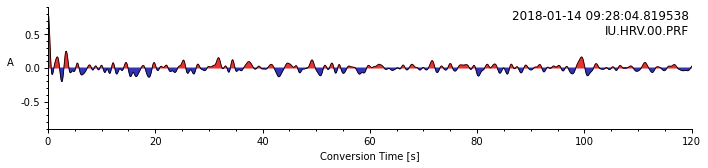

In [1]:
%load_ext autoreload
%autoreload 2

from pyglimer.rf.create import read_rf
from pyglimer.plot.plot_utils import set_mpl_params
set_mpl_params()

rfst = read_rf("database/waveforms/RF/P/IU/HRV/*.sac")

# Check traces
rfst[0].plot()

# Backazimuthal and rayparameter distribution

To get a good overview of the stations data, 
it's often beneficial to see where your data 
is coming from. 
A quicklook of over the spatial distribution 
is provided but the function `RFStream.plot_rb_dist()`,
which plots the distributiton of backazimuths and 
rayparameters in the stream. 

---
***Note*** the keyword for the phase that must be parsed. 
An `RFStream` can contain different phases.
The rayparameters for, e.g., S receiver functions are slightly different, 
but so are the surface S velocities. Hence, we have to adjust 
the surface velocity for the incident wave to approximate the incidence angle.

---

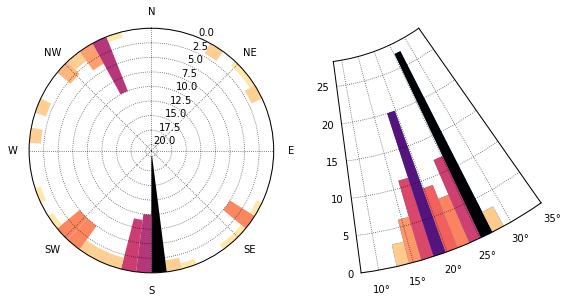

In [2]:
# Check distribtution
rfst.plot_distribution(phase="P")

## Moveout Correction

To stack the receiver functions, we need to perform moveout correction. To do this we use a
built-in velocity model. Here, `iasp91.dat`.

---
***Note:***
It is currently loaded from within the repo, therefore we change the path and back before doing anything.

---

In [3]:
import os
from pyglimer import RFStream 
from utils.helper import chdir

z, rfstm = rfst.moveout("iasp91.dat", multiple=False)

/home/pm/PyGLImER/src/pyglimer/rf/moveout.py:529: RuntimeWarning: invalid value encountered in sqrt
  q_a = np.sqrt(vp**-2 - p**2)


## Creating a single station stack

In [4]:
stack = rfst.station_stack()

In [5]:
print(stack[1].stats.type)
print(len(stack[1].data))

stastack
851


<AxesSubplot:xlabel='Conversion Depth [km]', ylabel='A    '>

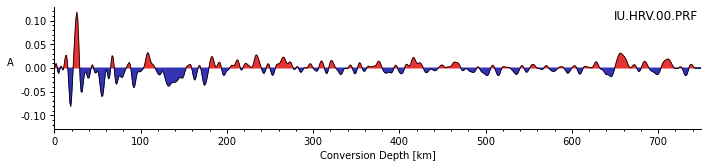

In [6]:
stack[1].plot()

# print()
# plt.plot(stack[0],stack[1].data)

## Using a Bootstrap algorithm to plot the standard deviation of the stack

To stack the receiver functions, we need to perform moveout correction. To do this we use a
built-in velocity model. Here, `iasp91.dat`.

---
***Note:***
It is currently loaded from within the repo, therefore we change the path and back before doing anything.

---

<AxesSubplot:xlabel='Conversion Depth [km]', ylabel='A    '>

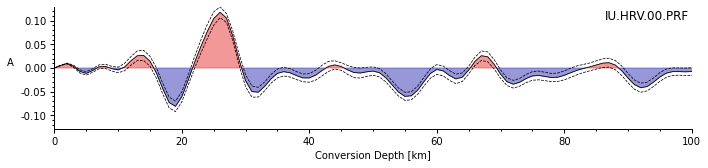

In [7]:
import numpy as np
bs = rfstm.bootstrap(b=1000)
std = np.std(bs, 0)
stack[1].plot(std=std, lim=[0,100])